In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
import healpy as hp
from healpy.visufunc import projplot
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools
from Secrest_dipole import SecrestDipole

### dipole results

In [6]:
d = SecrestDipole(catname='catwise_agns', mag='w1', maglim=16.4, blim=30, Rv=3.1, delRW=-0.008, load_init=False)
map_d_RWminus2sigma = d.load_hpxelatcorr()

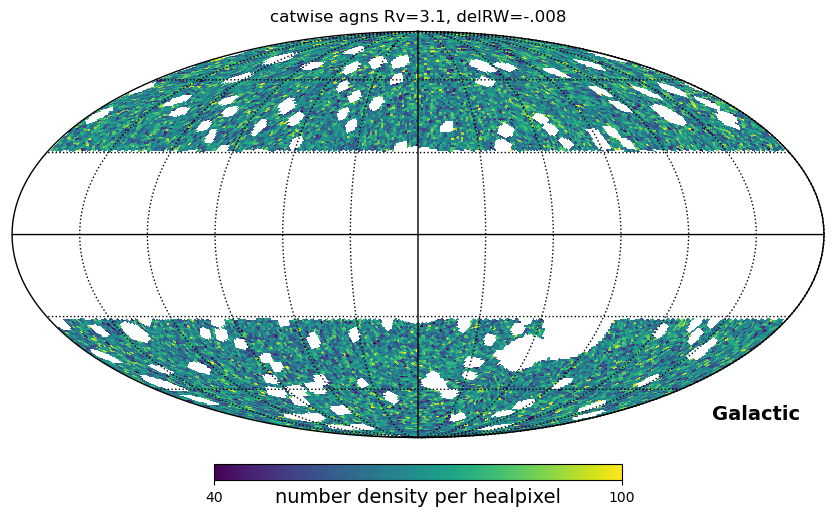

In [7]:
d.plot_map(map_d_RWminus2sigma, title='catwise agns Rv=3.1, delRW=-.008', min=40, max=100)

In [8]:
damp_RWminus2sigma, ddir_RWminus2sigma = d.compute_dipole(map_d_RWminus2sigma, verbose=True)

amp = 0.014535
direction:  <SkyCoord (Galactic): (l, b) in deg
    (240.68879543, 30.84419628)>


In [9]:
d = SecrestDipole(catname='catwise_agns', mag='w1', maglim=16.4, blim=30, Rv=3.1, delRW=0.008, load_init=False)
map_d_RWplus2sigma = d.load_hpxelatcorr()

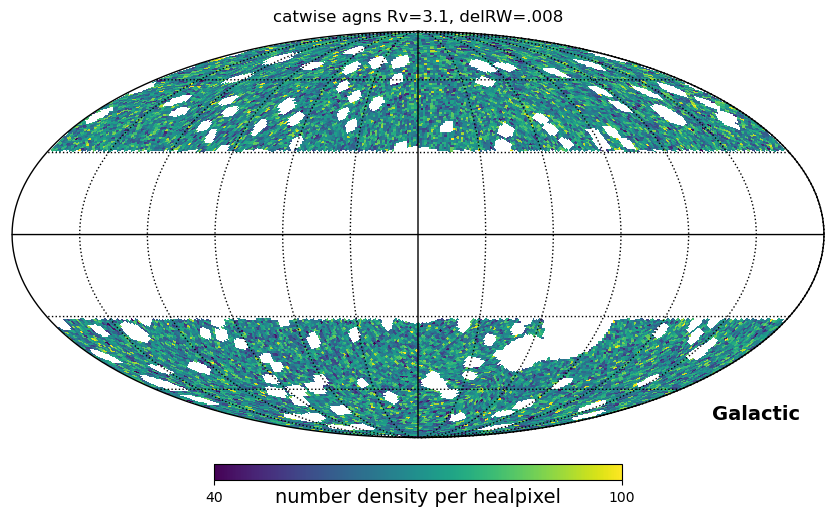

In [10]:
d.plot_map(map_d_RWplus2sigma, title='catwise agns Rv=3.1, delRW=.008', min=40, max=100)

In [11]:
damp_RWplus2sigma, ddir_RWplus2sigma = d.compute_dipole(map_d_RWplus2sigma, verbose=True)

amp = 0.013648
direction:  <SkyCoord (Galactic): (l, b) in deg
    (240.27500596, 31.43731195)>


In [12]:
d = SecrestDipole(catname='catwise_agns', mag='w1', maglim=16.4, blim=30, Rv=2.5, delRW=0., load_init=False)
map_d_Rv2p5 = d.load_hpxelatcorr()

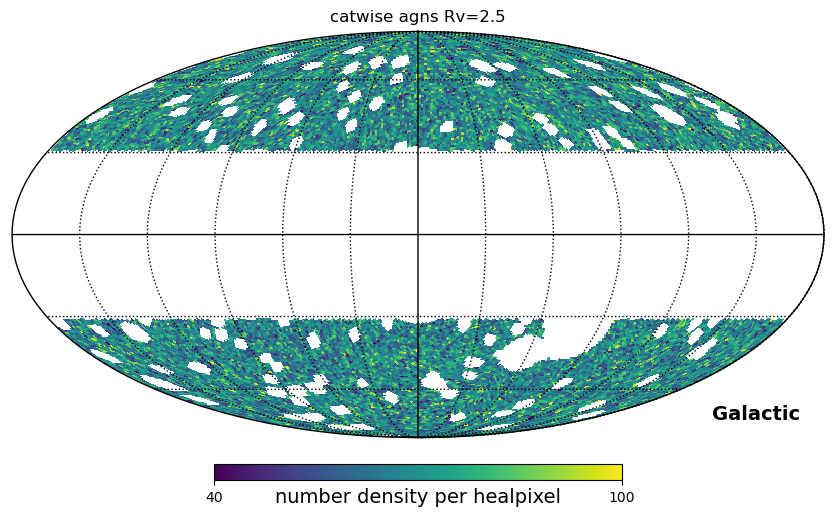

In [13]:
d.plot_map(map_d_Rv2p5, title='catwise agns Rv=2.5', min=40, max=100)

In [14]:
damp_Rv2p5, ddir_Rv2p5 = d.compute_dipole(map_d_Rv2p5, verbose=True)

amp = 0.014339
direction:  <SkyCoord (Galactic): (l, b) in deg
    (240.71647906, 30.8808499)>


In [15]:
d = SecrestDipole(catname='catwise_agns', mag='w1', maglim=16.4, blim=30, Rv=2.1, delRW=0., load_init=False)
map_d_Rv2p1 = d.load_hpxelatcorr()

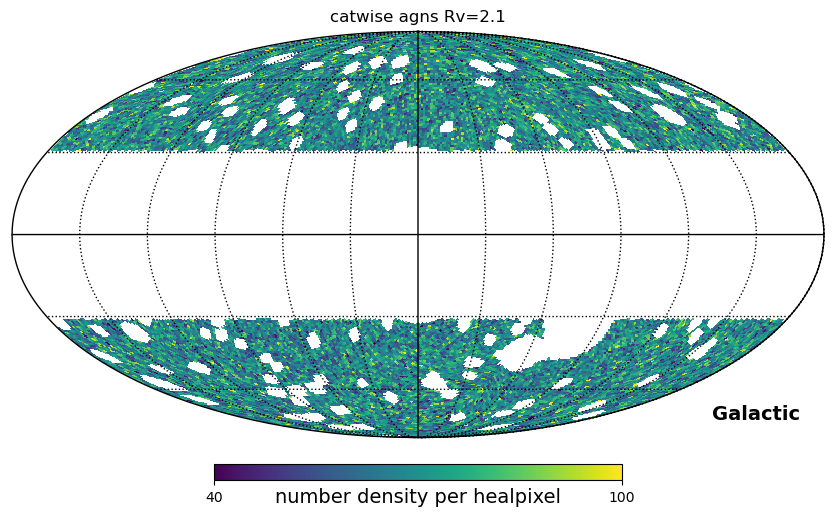

In [16]:
d.plot_map(map_d_Rv2p1, title='catwise agns Rv=2.1', min=40, max=100)

In [17]:
damp_Rv2p1, ddir_Rv2p1 = d.compute_dipole(map_d_Rv2p1, verbose=True)

amp = 0.014393
direction:  <SkyCoord (Galactic): (l, b) in deg
    (241.26550803, 30.88715713)>


In [77]:
def plot_dir(ddir, damp, a=1000, **kwargs):
    hp.visufunc.projplot(np.pi/2 * u.rad - ddir.b.to(u.rad).wrap_at(np.pi * u.rad), ddir.l.to(u.rad).wrap_at(np.pi * u.rad),
            ms=(a * damp), **kwargs)

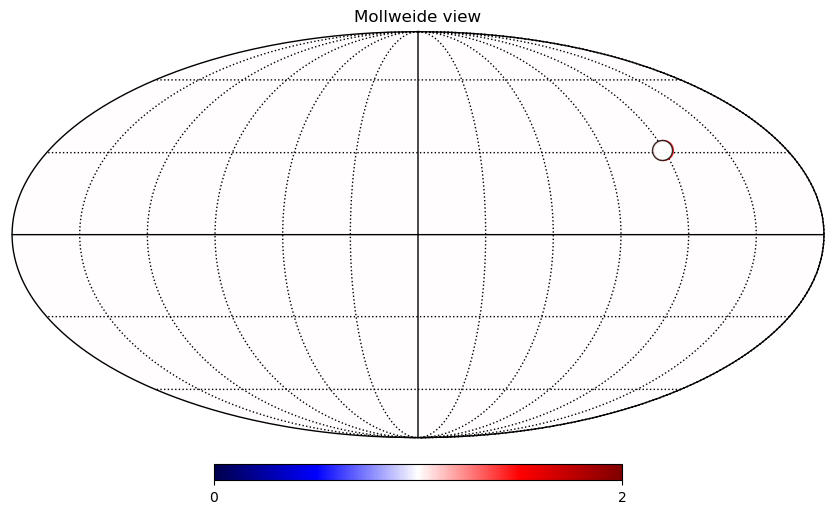

In [82]:
# hp.projview(np.ones(49152), cmap='seismic', graticule=True, graticule_labels=True)
hp.mollview(np.ones(49152), cmap='seismic')
hp.graticule()
plot_dir(ddir_Rv2p5, damp_Rv2p5, marker='o', color='w', mec='r', alpha=0.8)
plot_dir(ddir_Rv2p1, damp_Rv2p1, marker='o', color='w', mec='k', alpha=0.8)